In [1]:
import numpy  
import math 
import sympy   ##importing sympy 
from matplotlib import pyplot 
%matplotlib inline

## 1. Stability

The condition for a wave to be stable is;

$\sigma = \frac{c \Delta t}{\Delta x} <= 1$

$Therefore;$

$\Delta t <= \Delta x / c$

In [2]:
dx = 0.2  
c = 4      
dt = dx/c

print("The maximum value of Δt that will ensure the stability is;", dt)

The maximum value of Δt that will ensure the stability is; 0.05


## 2. Sympy

Using $Sympy$ evluate the partial derivative with respect to $x$ of the following eqaution at $x = 2.2$.

$\frac{\cos^2(x)sin^3(x)}{4x^5 \exp(x)}$

In [3]:
## Integration and lambdify have to imported from Sympy
from sympy import init_printing
init_printing()

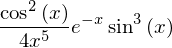

In [4]:
x = sympy.symbols('x')
u = sympy.cos(x)**2*(sympy.sin(x)**3)/((4*x**5)*sympy.exp(x))
u

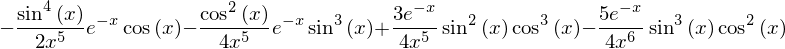

In [5]:
uprime = u.diff(x)
uprime

In [6]:
from sympy.utilities.lambdify import lambdify
f = uprime
print(f)

-exp(-x)*sin(x)**4*cos(x)/(2*x**5) - exp(-x)*sin(x)**3*cos(x)**2/(4*x**5) + 3*exp(-x)*sin(x)**2*cos(x)**3/(4*x**5) - 5*exp(-x)*sin(x)**3*cos(x)**2/(4*x**6)


In [7]:
f_lamb = lambdify((x),f)
print("The Value of equation at x = 2.2 is:",format(f_lamb(2.2)))

The Value of equation at x = 2.2 is: -0.00026648912670920613


## 3. Traffic Flow

The equations to describe the behaviour;

$V = V_{max}(1-\frac{\rho}{\rho_{max}})$

$F = F(\rho) = V(\rho)\rho = V_{max}\rho(1-\frac{\rho}{\rho_{max}})$

$\frac{\partial \rho}{\partial t} + \frac{\partial F}{\partial x} = 0$


#### Given

$V_{max} = 80 \frac{km}{hr}$

$L = 11 Km$

$\rho_{max} = 250 \frac{cars}{Km}$

$nx = 51$

$\Delta t = 0.001 hours$

In [8]:
L = 11
nx = 50
dx = L/(nx-1)
nt = 50
dt = 0.001
vmax = 136
rhomax = 250

In [9]:
x = numpy.linspace(0,L,nx)
rho = numpy.ones(nx)*20
rho[10:20] = 50
#rho.min()
#pyplot.plot(x,rho)
#pyplot.ylim(0,52)
#v = (vmax*(1-rho/rhomax))*(5/18)
#print(v.min())
#print(rho)

In [10]:
#v = (vmax*(1-rho/rhomax))*(5/18)

for n in range(1,nt):
    rn = rho.copy()
    #v = (vmax*(1-rho/rhomax))*(5/18)
    
    for j in range(1,nx):
        v = (vmax*(1-rho/rhomax))*(5/18)
        f1 = v * rho
        rho[1:]=rn[1:]-dt/dx*(f1[1:]-f1[0:-1])
        rho[0] = 10

In [11]:
vmin = (vmax*(1-rho/rhomax))*(5/18)
vn = numpy.min(vmin)
print(vn)

30.3831032934


In [12]:
vmean = (vmax*(1-rmean/rhomax))*(5/18)
vmean

NameError: name 'rmean' is not defined